In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np


print(tf.__version__)

2.2.0


## Load VGG16 Model

In [2]:
'''
VGG16 parameters 
- include_top = Boolean, whether to include the 3-FC layers at the top of the network
- weights = path to wieghts file, 'imagenet'(pre-training on ImageNet), None
- input_tensor = optinal Keras tensor to use as image input for the model
- input_shape = It should have 3 input channels 
- pooling = Optional pooling mode for feature extraction when include_top is False.
- classes = optional number of classes to classify images into, 
        only to be specified if include_top is True, 
        and if no weights argument is specified.
- classifier_activation = str or callable, Ignored unless include_top=True. ex) softmax

VGG16 returns keras.Model instance
'''
base_model = VGG16(weights='imagenet')

In [3]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
def get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    flatten = model.predict(x)
    return list(flatten[0])

In [6]:
class_names = os.listdir("../feature/feature_mfcc/")
class_names.sort()
   
forPrintList = [class_name.split('_')[1] for class_name in class_names]
print(forPrintList)

['kwakjuheon', 'kimjiho', 'songyejin', 'parksohui', 'moonyeonwoo', 'kangsubin', 'leekyeongeun', 'chochaeyeon', 'shindonghwan', 'kwakmirae', 'kimhyeryeong', 'chaeminjoon', 'kwakyiheon', 'leesumin', 'choihayoung', 'kangyeseo', 'kwakmihyang', 'eundano', 'limjinju', 'kimseongje', 'kwakbokyeong', 'ahnhyojin', 'heosehun', 'choijiwon', 'ahnjeongsuk', 'kwonyuna', 'kwoneunkyung', 'johaesu', 'leebyeongjin', 'hyeonsanghyeok', 'jennie', 'simseungmin', 'parksomi', 'yuminji', 'parksojin', 'kwonyeonwoo', 'ladakyeong', 'janghyomin', 'parkeunbi', 'parkdayeung', 'parkjongae', 'hansohee', 'janggyeoul', 'leewooju', 'nomyungok', 'heoyoonjung', 'heojaemin', 'kimsoyung', 'chuminha', 'kimhyeonsu', 'chaesonghwa', 'kwonyulim', 'kimminyoung', 'jueunhong', 'leejeongju', 'kwonnahui', 'kimdayeong', 'kwonsundo', 'kimhyeona', 'leehyojin', 'yuminji', 'jeonghojun', 'kanghyeyun', 'kimsubin', 'kimkihyeon', 'kimminji', 'myeongjaewon', 'kimjihyeon', 'choisuyeon', 'hwanghyebin', 'jangsoojin', 'kimhongjoo', 'kimhyorin', 'kim

In [7]:
x_list = []
y_list = []
fname_list =[]
for i in range(0,len(class_names)):
    files=os.listdir("../feature/feature_mfcc/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        print(files[j], j)
        x = np.load("../feature/feature_mfcc/"+class_names[i]+"/"+files[j])
        fname_list.append("../feature/feature_mfcc/"+class_names[i]+"/"+files[j])
        x_list.append(x)
        y_list.append(i)
print(type(x))
print(y_list)
# print(x_list)

2017019740001
2017019740001_kwakjuheon_4.npy 0
2017019740001_kwakjuheon_1.npy 1
2017019740001_kwakjuheon_0.npy 2
2017019740001_kwakjuheon_2.npy 3
2017019740001_kwakjuheon_3.npy 4
2017019740002
2017019740002_kimjiho_3.npy 0
2017019740002_kimjiho_1.npy 1
2017019740002_kimjiho_2.npy 2
2017019740002_kimjiho_4.npy 3
2017019740002_kimjiho_0.npy 4
2017019740003
2017019740003_songyejin_2.npy 0
2017019740003_songyejin_3.npy 1
2017019740003_songyejin_4.npy 2
2017019740003_songyejin_1.npy 3
2017019740003_songyejin_0.npy 4
2017019740004
2017019740004_parksohui_2.npy 0
2017019740004_parksohui_1.npy 1
2017019740004_parksohui_3.npy 2
2017019740004_parksohui_0.npy 3
2017019740004_parksohui_4.npy 4
2017019740005
2017019740005_moonyeonwoo_3.npy 0
2017019740005_moonyeonwoo_2.npy 1
2017019740005_moonyeonwoo_0.npy 2
2017019740005_moonyeonwoo_4.npy 3
2017019740005_moonyeonwoo_1.npy 4
2017019740006
2017019740006_kangsubin_3.npy 0
2017019740006_kangsubin_1.npy 1
2017019740006_kangsubin_4.npy 2
2017019740006_k

### Convert Feature Numpy Array to PNG image

In [8]:
import imageio
import os
def npy_2_png (cname,fname):
    if not os.path.exists("../feature/feature_mfcc_png/"):
        os.makedirs("../feature/feature_mfcc_png/")
    if not os.path.exists("../feature/feature_mfcc_png/"+cname) :
        os.makedirs("../feature/feature_mfcc_png/"+cname)
    
    array = np.load("../feature/feature_mfcc/"+cname+"/"+fname)
    
    array = array - np.min(array)
    array = array / np.max(array)
    array = array * 255.0
    
    i = fname.split('_')[2].split('.')[0]
    if os.path.exists("../feature/feature_mfcc_png/"+cname+"/{}.png".format(i)):
        os.remove("../feature/feature_mfcc_png/"+cname+"/{}.png".format(i))
        
    imageio.imwrite("../feature/feature_mfcc_png/"+cname+"/{}.png".format(i),array)
    return "../feature/feature_mfcc_png/"+cname+"/{}.png".format(i)

In [9]:
X_TF = []
y_TF = []
for i,fname in zip(range(0,len(fname_list)), fname_list):
    print(i,fname)
    
    mfcc = image.load_img(npy_2_png(fname.split('/')[3],fname.split('/')[4]), target_size=(224,224))
    tempX = image.img_to_array(mfcc)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    
    flatten = model.predict(tempX)
    
    X_TF.append(list(flatten[0]))
    y_TF.append(class_names.index(fname.split('/')[3]))

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../feature/feature_mfcc/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1 ../feature/feature_mfcc/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy
2 ../feature/feature_mfcc/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy
3 ../feature/feature_mfcc/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


4 ../feature/feature_mfcc/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy
5 ../feature/feature_mfcc/2017019740002_kimjiho/2017019740002_kimjiho_3.npy
6 ../feature/feature_mfcc/2017019740002_kimjiho/2017019740002_kimjiho_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


7 ../feature/feature_mfcc/2017019740002_kimjiho/2017019740002_kimjiho_2.npy
8 ../feature/feature_mfcc/2017019740002_kimjiho/2017019740002_kimjiho_4.npy
9 ../feature/feature_mfcc/2017019740002_kimjiho/2017019740002_kimjiho_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


10 ../feature/feature_mfcc/2017019740003_songyejin/2017019740003_songyejin_2.npy
11 ../feature/feature_mfcc/2017019740003_songyejin/2017019740003_songyejin_3.npy
12 ../feature/feature_mfcc/2017019740003_songyejin/2017019740003_songyejin_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


13 ../feature/feature_mfcc/2017019740003_songyejin/2017019740003_songyejin_1.npy
14 ../feature/feature_mfcc/2017019740003_songyejin/2017019740003_songyejin_0.npy
15 ../feature/feature_mfcc/2017019740004_parksohui/2017019740004_parksohui_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


16 ../feature/feature_mfcc/2017019740004_parksohui/2017019740004_parksohui_1.npy
17 ../feature/feature_mfcc/2017019740004_parksohui/2017019740004_parksohui_3.npy
18 ../feature/feature_mfcc/2017019740004_parksohui/2017019740004_parksohui_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


19 ../feature/feature_mfcc/2017019740004_parksohui/2017019740004_parksohui_4.npy
20 ../feature/feature_mfcc/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_3.npy
21 ../feature/feature_mfcc/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


22 ../feature/feature_mfcc/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_0.npy
23 ../feature/feature_mfcc/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_4.npy
24 ../feature/feature_mfcc/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


25 ../feature/feature_mfcc/2017019740006_kangsubin/2017019740006_kangsubin_3.npy
26 ../feature/feature_mfcc/2017019740006_kangsubin/2017019740006_kangsubin_1.npy
27 ../feature/feature_mfcc/2017019740006_kangsubin/2017019740006_kangsubin_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


28 ../feature/feature_mfcc/2017019740006_kangsubin/2017019740006_kangsubin_2.npy
29 ../feature/feature_mfcc/2017019740006_kangsubin/2017019740006_kangsubin_0.npy
30 ../feature/feature_mfcc/2017019740007_leekyeongeun/2017019740007_leekyeongeun_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


31 ../feature/feature_mfcc/2017019740007_leekyeongeun/2017019740007_leekyeongeun_4.npy
32 ../feature/feature_mfcc/2017019740007_leekyeongeun/2017019740007_leekyeongeun_0.npy
33 ../feature/feature_mfcc/2017019740007_leekyeongeun/2017019740007_leekyeongeun_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


34 ../feature/feature_mfcc/2017019740007_leekyeongeun/2017019740007_leekyeongeun_1.npy
35 ../feature/feature_mfcc/2017019740008_chochaeyeon/2017019740008_chochaeyeon_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


36 ../feature/feature_mfcc/2017019740008_chochaeyeon/2017019740008_chochaeyeon_3.npy
37 ../feature/feature_mfcc/2017019740008_chochaeyeon/2017019740008_chochaeyeon_2.npy
38 ../feature/feature_mfcc/2017019740008_chochaeyeon/2017019740008_chochaeyeon_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


39 ../feature/feature_mfcc/2017019740008_chochaeyeon/2017019740008_chochaeyeon_0.npy
40 ../feature/feature_mfcc/2017019740009_shindonghwan/2017019740009_shindonghwan_1.npy
41 ../feature/feature_mfcc/2017019740009_shindonghwan/2017019740009_shindonghwan_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


42 ../feature/feature_mfcc/2017019740009_shindonghwan/2017019740009_shindonghwan_4.npy
43 ../feature/feature_mfcc/2017019740009_shindonghwan/2017019740009_shindonghwan_0.npy
44 ../feature/feature_mfcc/2017019740009_shindonghwan/2017019740009_shindonghwan_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


45 ../feature/feature_mfcc/2017019740010_kwakmirae/2017019740010_kwakmirae_4.npy
46 ../feature/feature_mfcc/2017019740010_kwakmirae/2017019740010_kwakmirae_0.npy
47 ../feature/feature_mfcc/2017019740010_kwakmirae/2017019740010_kwakmirae_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


48 ../feature/feature_mfcc/2017019740010_kwakmirae/2017019740010_kwakmirae_2.npy
49 ../feature/feature_mfcc/2017019740010_kwakmirae/2017019740010_kwakmirae_3.npy
50 ../feature/feature_mfcc/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


51 ../feature/feature_mfcc/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_3.npy
52 ../feature/feature_mfcc/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_0.npy
53 ../feature/feature_mfcc/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


54 ../feature/feature_mfcc/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_2.npy
55 ../feature/feature_mfcc/2017019740012_chaeminjoon/2017019740012_chaeminjoon_0.npy
56 ../feature/feature_mfcc/2017019740012_chaeminjoon/2017019740012_chaeminjoon_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


57 ../feature/feature_mfcc/2017019740012_chaeminjoon/2017019740012_chaeminjoon_1.npy
58 ../feature/feature_mfcc/2017019740012_chaeminjoon/2017019740012_chaeminjoon_2.npy
59 ../feature/feature_mfcc/2017019740012_chaeminjoon/2017019740012_chaeminjoon_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


60 ../feature/feature_mfcc/2017019740013_kwakyiheon/2017019740013_kwakyiheon_0.npy
61 ../feature/feature_mfcc/2017019740013_kwakyiheon/2017019740013_kwakyiheon_1.npy
62 ../feature/feature_mfcc/2017019740013_kwakyiheon/2017019740013_kwakyiheon_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


63 ../feature/feature_mfcc/2017019740013_kwakyiheon/2017019740013_kwakyiheon_2.npy
64 ../feature/feature_mfcc/2017019740013_kwakyiheon/2017019740013_kwakyiheon_3.npy
65 ../feature/feature_mfcc/2017019740014_leesumin/2017019740014_leesumin_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


66 ../feature/feature_mfcc/2017019740014_leesumin/2017019740014_leesumin_4.npy
67 ../feature/feature_mfcc/2017019740014_leesumin/2017019740014_leesumin_2.npy
68 ../feature/feature_mfcc/2017019740014_leesumin/2017019740014_leesumin_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


69 ../feature/feature_mfcc/2017019740014_leesumin/2017019740014_leesumin_3.npy
70 ../feature/feature_mfcc/2017019740015_choihayoung/2017019740015_choihayoung_3.npy
71 ../feature/feature_mfcc/2017019740015_choihayoung/2017019740015_choihayoung_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


72 ../feature/feature_mfcc/2017019740015_choihayoung/2017019740015_choihayoung_4.npy
73 ../feature/feature_mfcc/2017019740015_choihayoung/2017019740015_choihayoung_2.npy
74 ../feature/feature_mfcc/2017019740015_choihayoung/2017019740015_choihayoung_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


75 ../feature/feature_mfcc/2017019740016_kangyeseo/2017019740016_kangyeseo_0.npy
76 ../feature/feature_mfcc/2017019740016_kangyeseo/2017019740016_kangyeseo_3.npy
77 ../feature/feature_mfcc/2017019740016_kangyeseo/2017019740016_kangyeseo_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


78 ../feature/feature_mfcc/2017019740016_kangyeseo/2017019740016_kangyeseo_4.npy
79 ../feature/feature_mfcc/2017019740016_kangyeseo/2017019740016_kangyeseo_1.npy
80 ../feature/feature_mfcc/2017019740017_kwakmihyang/2017019740017_kwakmihyang_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


81 ../feature/feature_mfcc/2017019740017_kwakmihyang/2017019740017_kwakmihyang_2.npy
82 ../feature/feature_mfcc/2017019740017_kwakmihyang/2017019740017_kwakmihyang_1.npy
83 ../feature/feature_mfcc/2017019740017_kwakmihyang/2017019740017_kwakmihyang_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


84 ../feature/feature_mfcc/2017019740017_kwakmihyang/2017019740017_kwakmihyang_0.npy
85 ../feature/feature_mfcc/2017019740018_eundano/2017019740018_eundano_0.npy
86 ../feature/feature_mfcc/2017019740018_eundano/2017019740018_eundano_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


87 ../feature/feature_mfcc/2017019740018_eundano/2017019740018_eundano_1.npy
88 ../feature/feature_mfcc/2017019740018_eundano/2017019740018_eundano_3.npy
89 ../feature/feature_mfcc/2017019740018_eundano/2017019740018_eundano_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


90 ../feature/feature_mfcc/2017019740019_limjinju/2017019740019_limjinju_1.npy
91 ../feature/feature_mfcc/2017019740019_limjinju/2017019740019_limjinju_3.npy
92 ../feature/feature_mfcc/2017019740019_limjinju/2017019740019_limjinju_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


93 ../feature/feature_mfcc/2017019740019_limjinju/2017019740019_limjinju_2.npy
94 ../feature/feature_mfcc/2017019740019_limjinju/2017019740019_limjinju_0.npy
95 ../feature/feature_mfcc/2017019740020_kimseongje/2017019740020_kimseongje_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


96 ../feature/feature_mfcc/2017019740020_kimseongje/2017019740020_kimseongje_1.npy
97 ../feature/feature_mfcc/2017019740020_kimseongje/2017019740020_kimseongje_4.npy
98 ../feature/feature_mfcc/2017019740020_kimseongje/2017019740020_kimseongje_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


99 ../feature/feature_mfcc/2017019740020_kimseongje/2017019740020_kimseongje_0.npy
100 ../feature/feature_mfcc/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_3.npy
101 ../feature/feature_mfcc/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


102 ../feature/feature_mfcc/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_0.npy
103 ../feature/feature_mfcc/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_1.npy
104 ../feature/feature_mfcc/2017019740021_kwakbokyeong/2017019740021_kwakbokyeong_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


105 ../feature/feature_mfcc/2017019740022_ahnhyojin/2017019740022_ahnhyojin_0.npy
106 ../feature/feature_mfcc/2017019740022_ahnhyojin/2017019740022_ahnhyojin_1.npy
107 ../feature/feature_mfcc/2017019740022_ahnhyojin/2017019740022_ahnhyojin_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


108 ../feature/feature_mfcc/2017019740022_ahnhyojin/2017019740022_ahnhyojin_3.npy
109 ../feature/feature_mfcc/2017019740022_ahnhyojin/2017019740022_ahnhyojin_4.npy
110 ../feature/feature_mfcc/2017019740023_heosehun/2017019740023_heosehun_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


111 ../feature/feature_mfcc/2017019740023_heosehun/2017019740023_heosehun_0.npy
112 ../feature/feature_mfcc/2017019740023_heosehun/2017019740023_heosehun_4.npy
113 ../feature/feature_mfcc/2017019740023_heosehun/2017019740023_heosehun_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


114 ../feature/feature_mfcc/2017019740023_heosehun/2017019740023_heosehun_1.npy
115 ../feature/feature_mfcc/2017019740024_choijiwon/2017019740024_choijiwon_2.npy
116 ../feature/feature_mfcc/2017019740024_choijiwon/2017019740024_choijiwon_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


117 ../feature/feature_mfcc/2017019740024_choijiwon/2017019740024_choijiwon_3.npy
118 ../feature/feature_mfcc/2017019740024_choijiwon/2017019740024_choijiwon_1.npy
119 ../feature/feature_mfcc/2017019740024_choijiwon/2017019740024_choijiwon_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


120 ../feature/feature_mfcc/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_2.npy
121 ../feature/feature_mfcc/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_4.npy
122 ../feature/feature_mfcc/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


123 ../feature/feature_mfcc/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_0.npy
124 ../feature/feature_mfcc/2017019740025_ahnjeongsuk/2017019740025_ahnjeongsuk_3.npy
125 ../feature/feature_mfcc/2017019770001_kwonyuna/2017019770001_kwonyuna_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


126 ../feature/feature_mfcc/2017019770001_kwonyuna/2017019770001_kwonyuna_0.npy
127 ../feature/feature_mfcc/2017019770001_kwonyuna/2017019770001_kwonyuna_3.npy
128 ../feature/feature_mfcc/2017019770001_kwonyuna/2017019770001_kwonyuna_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


129 ../feature/feature_mfcc/2017019770001_kwonyuna/2017019770001_kwonyuna_4.npy
130 ../feature/feature_mfcc/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_3.npy
131 ../feature/feature_mfcc/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


132 ../feature/feature_mfcc/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_0.npy
133 ../feature/feature_mfcc/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_1.npy
134 ../feature/feature_mfcc/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


135 ../feature/feature_mfcc/2017019770003_johaesu/2017019770003_johaesu_4.npy
136 ../feature/feature_mfcc/2017019770003_johaesu/2017019770003_johaesu_0.npy
137 ../feature/feature_mfcc/2017019770003_johaesu/2017019770003_johaesu_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


138 ../feature/feature_mfcc/2017019770003_johaesu/2017019770003_johaesu_2.npy
139 ../feature/feature_mfcc/2017019770003_johaesu/2017019770003_johaesu_3.npy
140 ../feature/feature_mfcc/2017019770004_leebyeongjin/2017019770004_leebyeongjin_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


141 ../feature/feature_mfcc/2017019770004_leebyeongjin/2017019770004_leebyeongjin_3.npy
142 ../feature/feature_mfcc/2017019770004_leebyeongjin/2017019770004_leebyeongjin_0.npy
143 ../feature/feature_mfcc/2017019770004_leebyeongjin/2017019770004_leebyeongjin_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


144 ../feature/feature_mfcc/2017019770004_leebyeongjin/2017019770004_leebyeongjin_1.npy
145 ../feature/feature_mfcc/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_1.npy
146 ../feature/feature_mfcc/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


147 ../feature/feature_mfcc/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_4.npy
148 ../feature/feature_mfcc/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_0.npy
149 ../feature/feature_mfcc/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


150 ../feature/feature_mfcc/2017019770006_jennie/2017019770006_jennie_4.npy
151 ../feature/feature_mfcc/2017019770006_jennie/2017019770006_jennie_0.npy
152 ../feature/feature_mfcc/2017019770006_jennie/2017019770006_jennie_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


153 ../feature/feature_mfcc/2017019770006_jennie/2017019770006_jennie_2.npy
154 ../feature/feature_mfcc/2017019770006_jennie/2017019770006_jennie_3.npy
155 ../feature/feature_mfcc/2017019770007_simseungmin/2017019770007_simseungmin_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


156 ../feature/feature_mfcc/2017019770007_simseungmin/2017019770007_simseungmin_2.npy
157 ../feature/feature_mfcc/2017019770007_simseungmin/2017019770007_simseungmin_1.npy
158 ../feature/feature_mfcc/2017019770007_simseungmin/2017019770007_simseungmin_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


159 ../feature/feature_mfcc/2017019770007_simseungmin/2017019770007_simseungmin_0.npy
160 ../feature/feature_mfcc/2017019770008_parksomi/2017019770008_parksomi_2.npy
161 ../feature/feature_mfcc/2017019770008_parksomi/2017019770008_parksomi_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


162 ../feature/feature_mfcc/2017019770008_parksomi/2017019770008_parksomi_3.npy
163 ../feature/feature_mfcc/2017019770008_parksomi/2017019770008_parksomi_0.npy
164 ../feature/feature_mfcc/2017019770008_parksomi/2017019770008_parksomi_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


165 ../feature/feature_mfcc/2017019770009_yuminji/2017019770009_yuminji_3.npy
166 ../feature/feature_mfcc/2017019770009_yuminji/2017019770009_yuminji_4.npy
167 ../feature/feature_mfcc/2017019770009_yuminji/2017019770009_yuminji_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


168 ../feature/feature_mfcc/2017019770009_yuminji/2017019770009_yuminji_1.npy
169 ../feature/feature_mfcc/2017019770009_yuminji/2017019770009_yuminji_2.npy
170 ../feature/feature_mfcc/2017019770010_parksojin/2017019770010_parksojin_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


171 ../feature/feature_mfcc/2017019770010_parksojin/2017019770010_parksojin_4.npy
172 ../feature/feature_mfcc/2017019770010_parksojin/2017019770010_parksojin_0.npy
173 ../feature/feature_mfcc/2017019770010_parksojin/2017019770010_parksojin_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


174 ../feature/feature_mfcc/2017019770010_parksojin/2017019770010_parksojin_2.npy
175 ../feature/feature_mfcc/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_0.npy
176 ../feature/feature_mfcc/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


177 ../feature/feature_mfcc/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_3.npy
178 ../feature/feature_mfcc/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_4.npy
179 ../feature/feature_mfcc/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


180 ../feature/feature_mfcc/2017019770012_ladakyeong/2017019770012_ladakyeong_1.npy
181 ../feature/feature_mfcc/2017019770012_ladakyeong/2017019770012_ladakyeong_4.npy
182 ../feature/feature_mfcc/2017019770012_ladakyeong/2017019770012_ladakyeong_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


183 ../feature/feature_mfcc/2017019770012_ladakyeong/2017019770012_ladakyeong_0.npy
184 ../feature/feature_mfcc/2017019770012_ladakyeong/2017019770012_ladakyeong_2.npy
185 ../feature/feature_mfcc/2017019770013_janghyomin/2017019770013_janghyomin_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


186 ../feature/feature_mfcc/2017019770013_janghyomin/2017019770013_janghyomin_3.npy
187 ../feature/feature_mfcc/2017019770013_janghyomin/2017019770013_janghyomin_0.npy
188 ../feature/feature_mfcc/2017019770013_janghyomin/2017019770013_janghyomin_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


189 ../feature/feature_mfcc/2017019770013_janghyomin/2017019770013_janghyomin_4.npy
190 ../feature/feature_mfcc/2017019770014_parkeunbi/2017019770014_parkeunbi_3.npy
191 ../feature/feature_mfcc/2017019770014_parkeunbi/2017019770014_parkeunbi_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


192 ../feature/feature_mfcc/2017019770014_parkeunbi/2017019770014_parkeunbi_0.npy
193 ../feature/feature_mfcc/2017019770014_parkeunbi/2017019770014_parkeunbi_1.npy
194 ../feature/feature_mfcc/2017019770014_parkeunbi/2017019770014_parkeunbi_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


195 ../feature/feature_mfcc/2017019770015_parkdayeung/2017019770015_parkdayeung_4.npy
196 ../feature/feature_mfcc/2017019770015_parkdayeung/2017019770015_parkdayeung_2.npy
197 ../feature/feature_mfcc/2017019770015_parkdayeung/2017019770015_parkdayeung_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


198 ../feature/feature_mfcc/2017019770015_parkdayeung/2017019770015_parkdayeung_1.npy
199 ../feature/feature_mfcc/2017019770015_parkdayeung/2017019770015_parkdayeung_0.npy
200 ../feature/feature_mfcc/2017019770016_parkjongae/2017019770016_parkjongae_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


201 ../feature/feature_mfcc/2017019770016_parkjongae/2017019770016_parkjongae_2.npy
202 ../feature/feature_mfcc/2017019770016_parkjongae/2017019770016_parkjongae_3.npy
203 ../feature/feature_mfcc/2017019770016_parkjongae/2017019770016_parkjongae_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


204 ../feature/feature_mfcc/2017019770016_parkjongae/2017019770016_parkjongae_1.npy
205 ../feature/feature_mfcc/2017019770017_hansohee/2017019770017_hansohee_3.npy
206 ../feature/feature_mfcc/2017019770017_hansohee/2017019770017_hansohee_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


207 ../feature/feature_mfcc/2017019770017_hansohee/2017019770017_hansohee_0.npy
208 ../feature/feature_mfcc/2017019770017_hansohee/2017019770017_hansohee_2.npy
209 ../feature/feature_mfcc/2017019770017_hansohee/2017019770017_hansohee_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


210 ../feature/feature_mfcc/2017019770018_janggyeoul/2017019770018_janggyeoul_4.npy
211 ../feature/feature_mfcc/2017019770018_janggyeoul/2017019770018_janggyeoul_3.npy
212 ../feature/feature_mfcc/2017019770018_janggyeoul/2017019770018_janggyeoul_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


213 ../feature/feature_mfcc/2017019770018_janggyeoul/2017019770018_janggyeoul_1.npy
214 ../feature/feature_mfcc/2017019770018_janggyeoul/2017019770018_janggyeoul_0.npy
215 ../feature/feature_mfcc/2017019770019_leewooju/2017019770019_leewooju_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


216 ../feature/feature_mfcc/2017019770019_leewooju/2017019770019_leewooju_4.npy
217 ../feature/feature_mfcc/2017019770019_leewooju/2017019770019_leewooju_1.npy
218 ../feature/feature_mfcc/2017019770019_leewooju/2017019770019_leewooju_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


219 ../feature/feature_mfcc/2017019770019_leewooju/2017019770019_leewooju_0.npy
220 ../feature/feature_mfcc/2017019770020_nomyungok/2017019770020_nomyungok_4.npy
221 ../feature/feature_mfcc/2017019770020_nomyungok/2017019770020_nomyungok_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


222 ../feature/feature_mfcc/2017019770020_nomyungok/2017019770020_nomyungok_0.npy
223 ../feature/feature_mfcc/2017019770020_nomyungok/2017019770020_nomyungok_2.npy
224 ../feature/feature_mfcc/2017019770020_nomyungok/2017019770020_nomyungok_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


225 ../feature/feature_mfcc/2017019770021_heoyoonjung/2017019770021_heoyoonjung_4.npy
226 ../feature/feature_mfcc/2017019770021_heoyoonjung/2017019770021_heoyoonjung_2.npy
227 ../feature/feature_mfcc/2017019770021_heoyoonjung/2017019770021_heoyoonjung_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


228 ../feature/feature_mfcc/2017019770021_heoyoonjung/2017019770021_heoyoonjung_1.npy
229 ../feature/feature_mfcc/2017019770021_heoyoonjung/2017019770021_heoyoonjung_0.npy
230 ../feature/feature_mfcc/2017019770022_heojaemin/2017019770022_heojaemin_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


231 ../feature/feature_mfcc/2017019770022_heojaemin/2017019770022_heojaemin_1.npy
232 ../feature/feature_mfcc/2017019770022_heojaemin/2017019770022_heojaemin_2.npy
233 ../feature/feature_mfcc/2017019770022_heojaemin/2017019770022_heojaemin_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


234 ../feature/feature_mfcc/2017019770022_heojaemin/2017019770022_heojaemin_3.npy
235 ../feature/feature_mfcc/2017019770023_kimsoyung/2017019770023_kimsoyung_4.npy
236 ../feature/feature_mfcc/2017019770023_kimsoyung/2017019770023_kimsoyung_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


237 ../feature/feature_mfcc/2017019770023_kimsoyung/2017019770023_kimsoyung_1.npy
238 ../feature/feature_mfcc/2017019770023_kimsoyung/2017019770023_kimsoyung_2.npy
239 ../feature/feature_mfcc/2017019770023_kimsoyung/2017019770023_kimsoyung_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


240 ../feature/feature_mfcc/2017019770024_chuminha/2017019770024_chuminha_0.npy
241 ../feature/feature_mfcc/2017019770024_chuminha/2017019770024_chuminha_4.npy
242 ../feature/feature_mfcc/2017019770024_chuminha/2017019770024_chuminha_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


243 ../feature/feature_mfcc/2017019770024_chuminha/2017019770024_chuminha_3.npy
244 ../feature/feature_mfcc/2017019770024_chuminha/2017019770024_chuminha_1.npy
245 ../feature/feature_mfcc/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


246 ../feature/feature_mfcc/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_2.npy
247 ../feature/feature_mfcc/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_4.npy
248 ../feature/feature_mfcc/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


249 ../feature/feature_mfcc/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_3.npy
250 ../feature/feature_mfcc/2017019770026_chaesonghwa/2017019770026_chaesonghwa_2.npy
251 ../feature/feature_mfcc/2017019770026_chaesonghwa/2017019770026_chaesonghwa_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


252 ../feature/feature_mfcc/2017019770026_chaesonghwa/2017019770026_chaesonghwa_1.npy
253 ../feature/feature_mfcc/2017019770026_chaesonghwa/2017019770026_chaesonghwa_4.npy
254 ../feature/feature_mfcc/2017019770026_chaesonghwa/2017019770026_chaesonghwa_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


255 ../feature/feature_mfcc/2017019770027_kwonyulim/2017019770027_kwonyulim_2.npy
256 ../feature/feature_mfcc/2017019770027_kwonyulim/2017019770027_kwonyulim_3.npy
257 ../feature/feature_mfcc/2017019770027_kwonyulim/2017019770027_kwonyulim_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


258 ../feature/feature_mfcc/2017019770027_kwonyulim/2017019770027_kwonyulim_1.npy
259 ../feature/feature_mfcc/2017019770027_kwonyulim/2017019770027_kwonyulim_0.npy
260 ../feature/feature_mfcc/2017019770028_kimminyoung/2017019770028_kimminyoung_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


261 ../feature/feature_mfcc/2017019770028_kimminyoung/2017019770028_kimminyoung_2.npy
262 ../feature/feature_mfcc/2017019770028_kimminyoung/2017019770028_kimminyoung_4.npy
263 ../feature/feature_mfcc/2017019770028_kimminyoung/2017019770028_kimminyoung_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


264 ../feature/feature_mfcc/2017019770028_kimminyoung/2017019770028_kimminyoung_1.npy
265 ../feature/feature_mfcc/2017019770029_jueunhong/2017019770029_jueunhong_4.npy
266 ../feature/feature_mfcc/2017019770029_jueunhong/2017019770029_jueunhong_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


267 ../feature/feature_mfcc/2017019770029_jueunhong/2017019770029_jueunhong_3.npy
268 ../feature/feature_mfcc/2017019770029_jueunhong/2017019770029_jueunhong_1.npy
269 ../feature/feature_mfcc/2017019770029_jueunhong/2017019770029_jueunhong_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


270 ../feature/feature_mfcc/2017019770030_leejeongju/2017019770030_leejeongju_1.npy
271 ../feature/feature_mfcc/2017019770030_leejeongju/2017019770030_leejeongju_0.npy
272 ../feature/feature_mfcc/2017019770030_leejeongju/2017019770030_leejeongju_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


273 ../feature/feature_mfcc/2017019770030_leejeongju/2017019770030_leejeongju_4.npy
274 ../feature/feature_mfcc/2017019770030_leejeongju/2017019770030_leejeongju_3.npy
275 ../feature/feature_mfcc/2017019770031_kwonnahui/2017019770031_kwonnahui_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


276 ../feature/feature_mfcc/2017019770031_kwonnahui/2017019770031_kwonnahui_4.npy
277 ../feature/feature_mfcc/2017019770031_kwonnahui/2017019770031_kwonnahui_3.npy
278 ../feature/feature_mfcc/2017019770031_kwonnahui/2017019770031_kwonnahui_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


279 ../feature/feature_mfcc/2017019770031_kwonnahui/2017019770031_kwonnahui_0.npy
280 ../feature/feature_mfcc/2017019770032_kimdayeong/2017019770032_kimdayeong_2.npy
281 ../feature/feature_mfcc/2017019770032_kimdayeong/2017019770032_kimdayeong_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


282 ../feature/feature_mfcc/2017019770032_kimdayeong/2017019770032_kimdayeong_1.npy
283 ../feature/feature_mfcc/2017019770032_kimdayeong/2017019770032_kimdayeong_4.npy
284 ../feature/feature_mfcc/2017019770032_kimdayeong/2017019770032_kimdayeong_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


285 ../feature/feature_mfcc/2017019770033_kwonsundo/2017019770033_kwonsundo_3.npy
286 ../feature/feature_mfcc/2017019770033_kwonsundo/2017019770033_kwonsundo_1.npy
287 ../feature/feature_mfcc/2017019770033_kwonsundo/2017019770033_kwonsundo_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


288 ../feature/feature_mfcc/2017019770033_kwonsundo/2017019770033_kwonsundo_4.npy
289 ../feature/feature_mfcc/2017019770033_kwonsundo/2017019770033_kwonsundo_0.npy
290 ../feature/feature_mfcc/2017019770034_kimhyeona/2017019770034_kimhyeona_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


291 ../feature/feature_mfcc/2017019770034_kimhyeona/2017019770034_kimhyeona_3.npy
292 ../feature/feature_mfcc/2017019770034_kimhyeona/2017019770034_kimhyeona_1.npy
293 ../feature/feature_mfcc/2017019770034_kimhyeona/2017019770034_kimhyeona_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


294 ../feature/feature_mfcc/2017019770034_kimhyeona/2017019770034_kimhyeona_4.npy
295 ../feature/feature_mfcc/2017019770035_leehyojin/2017019770035_leehyojin_4.npy
296 ../feature/feature_mfcc/2017019770035_leehyojin/2017019770035_leehyojin_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


297 ../feature/feature_mfcc/2017019770035_leehyojin/2017019770035_leehyojin_3.npy
298 ../feature/feature_mfcc/2017019770035_leehyojin/2017019770035_leehyojin_2.npy
299 ../feature/feature_mfcc/2017019770035_leehyojin/2017019770035_leehyojin_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


300 ../feature/feature_mfcc/2017019770036_yuminji/2017019770036_yuminji_2.npy
301 ../feature/feature_mfcc/2017019770036_yuminji/2017019770036_yuminji_1.npy
302 ../feature/feature_mfcc/2017019770036_yuminji/2017019770036_yuminji_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


303 ../feature/feature_mfcc/2017019770036_yuminji/2017019770036_yuminji_4.npy
304 ../feature/feature_mfcc/2017019770036_yuminji/2017019770036_yuminji_0.npy
305 ../feature/feature_mfcc/2017019770037_jeonghojun/2017019770037_jeonghojun_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


306 ../feature/feature_mfcc/2017019770037_jeonghojun/2017019770037_jeonghojun_3.npy
307 ../feature/feature_mfcc/2017019770037_jeonghojun/2017019770037_jeonghojun_1.npy
308 ../feature/feature_mfcc/2017019770037_jeonghojun/2017019770037_jeonghojun_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


309 ../feature/feature_mfcc/2017019770037_jeonghojun/2017019770037_jeonghojun_4.npy
310 ../feature/feature_mfcc/2017019770038_kanghyeyun/2017019770038_kanghyeyun_1.npy
311 ../feature/feature_mfcc/2017019770038_kanghyeyun/2017019770038_kanghyeyun_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


312 ../feature/feature_mfcc/2017019770038_kanghyeyun/2017019770038_kanghyeyun_2.npy
313 ../feature/feature_mfcc/2017019770038_kanghyeyun/2017019770038_kanghyeyun_0.npy
314 ../feature/feature_mfcc/2017019770038_kanghyeyun/2017019770038_kanghyeyun_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


315 ../feature/feature_mfcc/2017019880001_kimsubin/2017019880001_kimsubin_1.npy
316 ../feature/feature_mfcc/2017019880001_kimsubin/2017019880001_kimsubin_4.npy
317 ../feature/feature_mfcc/2017019880001_kimsubin/2017019880001_kimsubin_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


318 ../feature/feature_mfcc/2017019880001_kimsubin/2017019880001_kimsubin_0.npy
319 ../feature/feature_mfcc/2017019880001_kimsubin/2017019880001_kimsubin_2.npy
320 ../feature/feature_mfcc/2017019880002_kimkihyeon/2017019880002_kimkihyeon_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


321 ../feature/feature_mfcc/2017019880002_kimkihyeon/2017019880002_kimkihyeon_3.npy
322 ../feature/feature_mfcc/2017019880002_kimkihyeon/2017019880002_kimkihyeon_4.npy
323 ../feature/feature_mfcc/2017019880002_kimkihyeon/2017019880002_kimkihyeon_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


324 ../feature/feature_mfcc/2017019880002_kimkihyeon/2017019880002_kimkihyeon_1.npy
325 ../feature/feature_mfcc/2017019880003_kimminji/2017019880003_kimminji_1.npy
326 ../feature/feature_mfcc/2017019880003_kimminji/2017019880003_kimminji_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


327 ../feature/feature_mfcc/2017019880003_kimminji/2017019880003_kimminji_2.npy
328 ../feature/feature_mfcc/2017019880003_kimminji/2017019880003_kimminji_0.npy
329 ../feature/feature_mfcc/2017019880003_kimminji/2017019880003_kimminji_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


330 ../feature/feature_mfcc/2017019880004_myeongjaewon/2017019880004_myeongjaewon_2.npy
331 ../feature/feature_mfcc/2017019880004_myeongjaewon/2017019880004_myeongjaewon_1.npy
332 ../feature/feature_mfcc/2017019880004_myeongjaewon/2017019880004_myeongjaewon_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


333 ../feature/feature_mfcc/2017019880004_myeongjaewon/2017019880004_myeongjaewon_4.npy
334 ../feature/feature_mfcc/2017019880004_myeongjaewon/2017019880004_myeongjaewon_3.npy
335 ../feature/feature_mfcc/2017019880005_kimjihyeon/2017019880005_kimjihyeon_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


336 ../feature/feature_mfcc/2017019880005_kimjihyeon/2017019880005_kimjihyeon_0.npy
337 ../feature/feature_mfcc/2017019880005_kimjihyeon/2017019880005_kimjihyeon_4.npy
338 ../feature/feature_mfcc/2017019880005_kimjihyeon/2017019880005_kimjihyeon_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


339 ../feature/feature_mfcc/2017019880005_kimjihyeon/2017019880005_kimjihyeon_2.npy
340 ../feature/feature_mfcc/2017019880006_choisuyeon/2017019880006_choisuyeon_3.npy
341 ../feature/feature_mfcc/2017019880006_choisuyeon/2017019880006_choisuyeon_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


342 ../feature/feature_mfcc/2017019880006_choisuyeon/2017019880006_choisuyeon_1.npy
343 ../feature/feature_mfcc/2017019880006_choisuyeon/2017019880006_choisuyeon_2.npy
344 ../feature/feature_mfcc/2017019880006_choisuyeon/2017019880006_choisuyeon_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


345 ../feature/feature_mfcc/2017019880007_hwanghyebin/2017019880007_hwanghyebin_4.npy
346 ../feature/feature_mfcc/2017019880007_hwanghyebin/2017019880007_hwanghyebin_2.npy
347 ../feature/feature_mfcc/2017019880007_hwanghyebin/2017019880007_hwanghyebin_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


348 ../feature/feature_mfcc/2017019880007_hwanghyebin/2017019880007_hwanghyebin_3.npy
349 ../feature/feature_mfcc/2017019880007_hwanghyebin/2017019880007_hwanghyebin_0.npy
350 ../feature/feature_mfcc/2017019880008_jangsoojin/2017019880008_jangsoojin_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


351 ../feature/feature_mfcc/2017019880008_jangsoojin/2017019880008_jangsoojin_0.npy
352 ../feature/feature_mfcc/2017019880008_jangsoojin/2017019880008_jangsoojin_1.npy
353 ../feature/feature_mfcc/2017019880008_jangsoojin/2017019880008_jangsoojin_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


354 ../feature/feature_mfcc/2017019880008_jangsoojin/2017019880008_jangsoojin_4.npy
355 ../feature/feature_mfcc/2017019880009_kimhongjoo/2017019880009_kimhongjoo_3.npy
356 ../feature/feature_mfcc/2017019880009_kimhongjoo/2017019880009_kimhongjoo_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


357 ../feature/feature_mfcc/2017019880009_kimhongjoo/2017019880009_kimhongjoo_1.npy
358 ../feature/feature_mfcc/2017019880009_kimhongjoo/2017019880009_kimhongjoo_4.npy
359 ../feature/feature_mfcc/2017019880009_kimhongjoo/2017019880009_kimhongjoo_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


360 ../feature/feature_mfcc/2017019880010_kimhyorin/2017019880010_kimhyorin_0.npy
361 ../feature/feature_mfcc/2017019880010_kimhyorin/2017019880010_kimhyorin_1.npy
362 ../feature/feature_mfcc/2017019880010_kimhyorin/2017019880010_kimhyorin_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


363 ../feature/feature_mfcc/2017019880010_kimhyorin/2017019880010_kimhyorin_3.npy
364 ../feature/feature_mfcc/2017019880010_kimhyorin/2017019880010_kimhyorin_2.npy
365 ../feature/feature_mfcc/2017019880011_kimjihyun/2017019880011_kimjihyun_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


366 ../feature/feature_mfcc/2017019880011_kimjihyun/2017019880011_kimjihyun_3.npy
367 ../feature/feature_mfcc/2017019880011_kimjihyun/2017019880011_kimjihyun_2.npy
368 ../feature/feature_mfcc/2017019880011_kimjihyun/2017019880011_kimjihyun_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


369 ../feature/feature_mfcc/2017019880011_kimjihyun/2017019880011_kimjihyun_4.npy
370 ../feature/feature_mfcc/2017019880012_kimsongyi/2017019880012_kimsongyi_4.npy
371 ../feature/feature_mfcc/2017019880012_kimsongyi/2017019880012_kimsongyi_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


372 ../feature/feature_mfcc/2017019880012_kimsongyi/2017019880012_kimsongyi_3.npy
373 ../feature/feature_mfcc/2017019880012_kimsongyi/2017019880012_kimsongyi_2.npy
374 ../feature/feature_mfcc/2017019880012_kimsongyi/2017019880012_kimsongyi_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


375 ../feature/feature_mfcc/2017019880013_kotaewan/2017019880013_kotaewan_0.npy
376 ../feature/feature_mfcc/2017019880013_kotaewan/2017019880013_kotaewan_1.npy
377 ../feature/feature_mfcc/2017019880013_kotaewan/2017019880013_kotaewan_3.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


378 ../feature/feature_mfcc/2017019880013_kotaewan/2017019880013_kotaewan_2.npy
379 ../feature/feature_mfcc/2017019880013_kotaewan/2017019880013_kotaewan_4.npy
380 ../feature/feature_mfcc/2017019880014_leedanbee/2017019880014_leedanbee_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


381 ../feature/feature_mfcc/2017019880014_leedanbee/2017019880014_leedanbee_2.npy
382 ../feature/feature_mfcc/2017019880014_leedanbee/2017019880014_leedanbee_4.npy
383 ../feature/feature_mfcc/2017019880014_leedanbee/2017019880014_leedanbee_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


384 ../feature/feature_mfcc/2017019880014_leedanbee/2017019880014_leedanbee_3.npy
385 ../feature/feature_mfcc/2017019880015_leejungjoon/2017019880015_leejungjoon_3.npy
386 ../feature/feature_mfcc/2017019880015_leejungjoon/2017019880015_leejungjoon_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


387 ../feature/feature_mfcc/2017019880015_leejungjoon/2017019880015_leejungjoon_4.npy
388 ../feature/feature_mfcc/2017019880015_leejungjoon/2017019880015_leejungjoon_1.npy
389 ../feature/feature_mfcc/2017019880015_leejungjoon/2017019880015_leejungjoon_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


390 ../feature/feature_mfcc/2017019880016_parkjongkook/2017019880016_parkjongkook_0.npy
391 ../feature/feature_mfcc/2017019880016_parkjongkook/2017019880016_parkjongkook_3.npy
392 ../feature/feature_mfcc/2017019880016_parkjongkook/2017019880016_parkjongkook_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


393 ../feature/feature_mfcc/2017019880016_parkjongkook/2017019880016_parkjongkook_1.npy
394 ../feature/feature_mfcc/2017019880016_parkjongkook/2017019880016_parkjongkook_2.npy
395 ../feature/feature_mfcc/2017019880017_sungsoohyun/2017019880017_sungsoohyun_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


396 ../feature/feature_mfcc/2017019880017_sungsoohyun/2017019880017_sungsoohyun_1.npy
397 ../feature/feature_mfcc/2017019880017_sungsoohyun/2017019880017_sungsoohyun_3.npy
398 ../feature/feature_mfcc/2017019880017_sungsoohyun/2017019880017_sungsoohyun_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


399 ../feature/feature_mfcc/2017019880017_sungsoohyun/2017019880017_sungsoohyun_2.npy
400 ../feature/feature_mfcc/2017019880018_wonjoonho/2017019880018_wonjoonho_4.npy
401 ../feature/feature_mfcc/2017019880018_wonjoonho/2017019880018_wonjoonho_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


402 ../feature/feature_mfcc/2017019880018_wonjoonho/2017019880018_wonjoonho_3.npy
403 ../feature/feature_mfcc/2017019880018_wonjoonho/2017019880018_wonjoonho_1.npy
404 ../feature/feature_mfcc/2017019880018_wonjoonho/2017019880018_wonjoonho_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


405 ../feature/feature_mfcc/2017019880019_wonsonghee/2017019880019_wonsonghee_2.npy
406 ../feature/feature_mfcc/2017019880019_wonsonghee/2017019880019_wonsonghee_3.npy
407 ../feature/feature_mfcc/2017019880019_wonsonghee/2017019880019_wonsonghee_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


408 ../feature/feature_mfcc/2017019880019_wonsonghee/2017019880019_wonsonghee_1.npy
409 ../feature/feature_mfcc/2017019880019_wonsonghee/2017019880019_wonsonghee_0.npy
410 ../feature/feature_mfcc/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_4.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


411 ../feature/feature_mfcc/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_1.npy
412 ../feature/feature_mfcc/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_0.npy
413 ../feature/feature_mfcc/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_2.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


414 ../feature/feature_mfcc/2017019880020_yoonhyeeun/2017019880020_yoonhyeeun_3.npy


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X_TF_train = np.array(X_TF)
y_TF_train = np.array(y_TF)

X_TF_train, X_TF_test, y_TF_train, y_TF_test = train_test_split(X_TF_train, y_TF_train, test_size=0.30, random_state=42, stratify=y_TF_train)

from tensorflow.keras.utils import to_categorical
y_TF_train_encoded = tf.keras.utils.to_categorical(y_TF_train)
y_TF_test_encoded = tf.keras.utils.to_categorical(y_TF_test)

X_TF_train_reshape = X_TF_train.reshape(-1, X_TF_train.shape[1], 1)
X_TF_test_reshape   = X_TF_test.reshape(-1, X_TF_test.shape[1], 1)

In [11]:
print(X_TF_train_reshape.shape)
print(X_TF_test_reshape.shape)

print(y_TF_train_encoded.shape)
print(y_TF_test_encoded.shape)

(290, 25088, 1)
(125, 25088, 1)
(290, 83)
(125, 83)


## Classifier Learninig 

#### Linear SVM

In [12]:
def val_npy_2_png (cname,fname):
    if not os.path.exists("../feature/feature_mfcc_validation_png/"):
        os.makedirs("../feature/feature_mfcc_validation_png/")
    if not os.path.exists("../feature/feature_mfcc_validation_png/"+cname) :
        os.makedirs("../feature/feature_mfcc_validation_png/"+cname)
    
    array = np.load("../feature/feature_mfcc_validation/"+cname+"/"+fname)
    array = array - np.min(array)
    array = array / np.max(array)
    array = array * 255.0
    
    i = fname.split('_')[2].split('.')[0]
    if os.path.exists("../feature/feature_mfcc_validation_png/"+cname+"/{}.png".format(i)):
        os.remove("../feature/feature_mfcc_validation_png/"+cname+"/{}.png".format(i))
        
    imageio.imwrite("../feature/feature_mfcc_validation_png/"+cname+"/{}.png".format(i),array)
    return "../feature/feature_mfcc_validation_png/"+cname+"/{}.png".format(i)

In [20]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_TF_train, y_TF_train)

predicted = clf.predict(X_TF_test)

# get the accuracy
print (accuracy_score(y_TF_test, predicted))

0.752


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [21]:
from sklearn.metrics import classification_report
target_names = [class_name.split('_')[1] for class_name in class_names]
print(classification_report(y_TF_test, predicted, target_names=target_names))

                precision    recall  f1-score   support

    kwakjuheon       0.50      1.00      0.67         1
       kimjiho       1.00      0.50      0.67         2
     songyejin       1.00      1.00      1.00         2
     parksohui       1.00      0.50      0.67         2
   moonyeonwoo       0.00      0.00      0.00         1
     kangsubin       0.50      1.00      0.67         1
  leekyeongeun       1.00      0.50      0.67         2
   chochaeyeon       0.50      1.00      0.67         1
  shindonghwan       1.00      1.00      1.00         2
     kwakmirae       1.00      1.00      1.00         1
  kimhyeryeong       0.00      0.00      0.00         1
   chaeminjoon       1.00      0.50      0.67         2
    kwakyiheon       0.00      0.00      0.00         1
      leesumin       0.50      1.00      0.67         1
   choihayoung       1.00      1.00      1.00         2
     kangyeseo       0.67      1.00      0.80         2
   kwakmihyang       0.00      0.00      0.00  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
y_TF_score = clf.fit(X_TF_train, y_TF_train).decision_function(X_TF_test)

for i in range(0, len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_TF_test_encoded[:, i], y_TF_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_TF_test_encoded.ravel(), y_TF_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<ipython-input-23-a783fe5065c0>:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


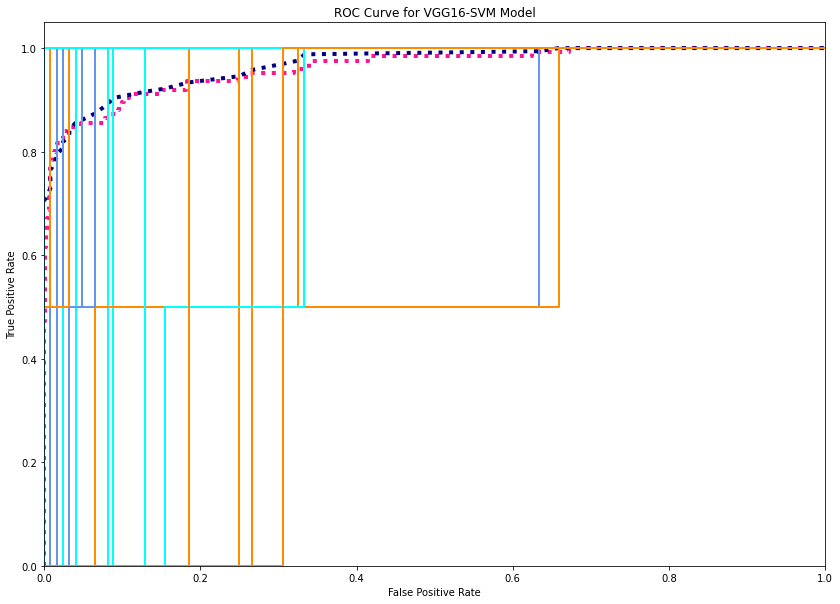

In [23]:
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(0, len(class_names))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(0, len(class_names)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(class_names)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (14,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw =2
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for VGG16-SVM Model')
# plt.legend(loc="lower right")
plt.show()

In [24]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_TF_train, y_TF_train)

x_validation_list=[]
y_validation_list=[]

val_class_names = os.listdir("../feature/feature_mfcc_validation/")
val_class_names.sort()
val_fname=[]

for i in range(0,len(val_class_names)):
    val_files=os.listdir("../feature/feature_mfcc_validation/"+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]
    for j in range(0, len(val_files)):
        val_fname.append("../feature/feature_mfcc_validation/"+val_class_names[i]+"/"+val_files[j])

X_TF_pred = []
y_TF_pred = []

for i,fname in zip(range(0,len(val_fname)), val_fname):
    print(i,fname)
    
    mfcc = image.load_img(val_npy_2_png(fname.split('/')[3],fname.split('/')[4]), target_size=(224,224))
    tempX = image.img_to_array(mfcc)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    
    flatten = model.predict(tempX)
    
    X_TF_pred.append(list(flatten[0]))
    y_TF_pred.append(val_class_names.index(fname.split('/')[3]))

    
X_TF_pred = np.array(X_TF_pred)
y_TF_pred = np.array(y_TF_pred)
y_TF_pred_encode = tf.keras.utils.to_categorical(y_TF_pred)

predicted = clf.predict(X_TF_pred)
real =[]
for i,pred in zip(range(0, len(predicted)), predicted) :
    print("Predict :",class_names[pred], ", Real :", val_class_names[y_TF_pred[i]])
    print(val_class_names[y_TF_pred[i]])
    real.append(class_names.index(val_class_names[y_TF_pred[i]]))

# get the accuracy
print (accuracy_score(real, predicted))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../feature/feature_mfcc_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy
1 ../feature/feature_mfcc_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy
2 ../feature/feature_mfcc_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


3 ../feature/feature_mfcc_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy
4 ../feature/feature_mfcc_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy
5 ../feature/feature_mfcc_validation/2017019880001_kimsubin/2017019880001_kimsubin_1.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


6 ../feature/feature_mfcc_validation/2017019880001_kimsubin/2017019880001_kimsubin_4.npy
7 ../feature/feature_mfcc_validation/2017019880001_kimsubin/2017019880001_kimsubin_3.npy
8 ../feature/feature_mfcc_validation/2017019880001_kimsubin/2017019880001_kimsubin_0.npy


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


9 ../feature/feature_mfcc_validation/2017019880001_kimsubin/2017019880001_kimsubin_2.npy
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
2017019740001_kwakjuheon
Predict : 2017019770005_hyeonsanghyeok , Real : 2017019740001_kwakjuheon
2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
2017019740001_kwakjuheon
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
2017019880001_kimsubin
Predict : 2017019770031_kwonnahui , Real : 2017019880001_kimsubin
2017019880001_kimsubin
Predict : 2017019770037_jeonghojun , Real : 2017019880001_kimsubin
2017019880001_kimsubin
Predict : 2017019880015_leejungjoon , Real : 2017019880001_kimsubin
2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
2017019880001_

### Global Average Pooling